# Data Preparation

In [49]:
import pandas as pd

In [11]:
dir="../dataset/"
file1="un-general-debates.csv"
df1=pd.read_csv(dir+file1)
file2="Speakers_by_session.xlsx"
df2=pd.read_excel(dir+file2)
df1.rename(columns={'ISO Code':'country'})
df2.rename(columns={'Year':'year', 'Session':'session', 'ISO Code':'country','Country':'country_name',
                    'Name of Person Speaking':'speaker','Post':'position'}, inplace=True)
df2.drop('Unnamed: 6',axis=1, inplace=True)

df=df1.merge(df2,how='left',on=['year','session','country'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     10559 non-null  int64 
 1   session                  10559 non-null  int64 
 2   country                  10558 non-null  object
 3   country_name             10559 non-null  object
 4   Name of Person Speaking  10551 non-null  object
 5   position                 5903 non-null   object
dtypes: int64(2), object(4)
memory usage: 495.1+ KB


In [12]:
df.to_csv(dir+"un-general-debates-blueprint.csv")

# 1.4 Data EDA

In [13]:
file="un-general-debates-blueprint.csv"
df=pd.read_csv("../dataset/"+file, index_col=0)
display(df.sample(2))
display(df.sample(frac=0.1))

,session,year,country,text,country_name,speaker,position
1925,33,1978,EGY,"﻿1.\tMr. President, before starting to address...",Egypt,Abdel Meguid,NaN
2878,64,2009,CZE,"My country, the Czech \nRepublic, has always a...",Czech Republic,Vaclav Klaus,President


,session,year,country,text,country_name,speaker,position
1639,67,2012,PAK,"﻿Before I begin my statement,\nI want to expre...",Pakistan,Asif Ali Zardari,President
7293,62,2007,CHE,"At the \noutset, Sir, I should like to congra...",Switzerland,"Mrs. Micheline Calmy-Rey,",President
1672,67,2012,MAR,﻿His Majesty King Mohammed VI asked me to\ncon...,Morocco,Prince Moulay Rachid,Head of State
4256,53,1998,POL,Allow me first to congratulate\nthe President ...,Poland,Bronislaw Geremek,Minister for Foreign Affairs
1685,67,2012,PNG,﻿Papua New Guinea\ncongratulates Mr. Jeremić o...,Papua New Guinea,Rimbink Pato,Minister for Foreign Affairs
...,...,...,...,...,...,...,...
4849,69,2014,FSM,I would like to congratulate \nMr. Sam Kutesa ...,"Micronesia, Federated States of",Emanuel Mori,President
6424,45,1990,GHA,﻿\nThe close and cordial relations between Mal...,Ghana,ASAMOAH,NaN
1209,57,2002,GNB,"﻿First of all, I would like to thank the\noutg...",Guinea-Bissau,Filomena Masaarenhas Tipote,Minister for Foreign Affairs
4609,59,2004,JOR,"First, I\nwish to warmly congratulate you, Sir...",Jordan,Mr. Marwan MUASHER,Minister for Foreign Affairs


In [15]:
## 텍스트 문자열의 길이를 담은 컬럼 length 추가
df['length']=df['text'].str.len()

## 수치형 자료 컬럼에 대한 요약 통계
display(df.describe().T)

## 범주형 자료 컬럼에 대한 요약 통계
display(df[['country','speaker']].describe(include='O').T) # 'O': np.object의 별칠

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


,count,unique,top,freq
country,7507,199,IRN,46
speaker,7473,5425,Seyoum Mesfin,12


In [16]:
## 결측치 확인
display(df.isna().sum())

session            0
year               0
country            0
text               0
country_name      32
speaker           34
position        3014
length             0
dtype: int64

In [17]:
## 결측치 대체
df['speaker'].fillna('unknown', inplace=True)

## 동일한 사람이더라도 다양하게 명명될 수 있다는 점에 유의
print(df[df['speaker'].str.contains('Bush')]['speaker'].value_counts())

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64


<Axes: >

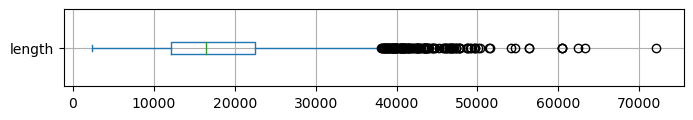

In [25]:
## 값분포 시각화
df['length'].plot(kind='box', vert=False, figsize=(8, 1), grid=True) # pandas 내장 plot 기능, vert false: 수직 x -> 수평으로 보여주기

<Axes: ylabel='Frequency'>

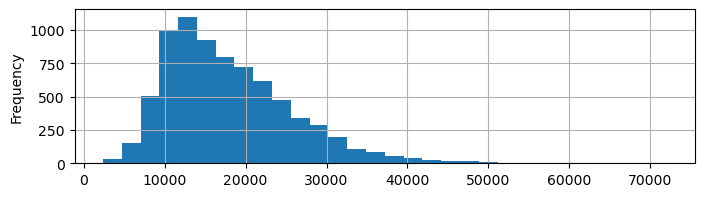

In [26]:
df['length'].plot(kind='hist', bins=30, figsize=(8, 2), grid=True)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


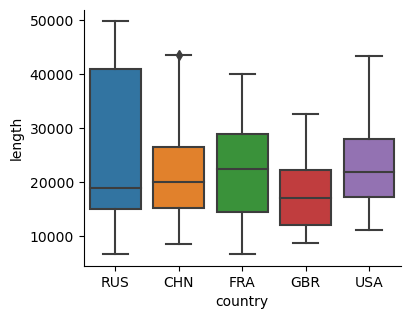

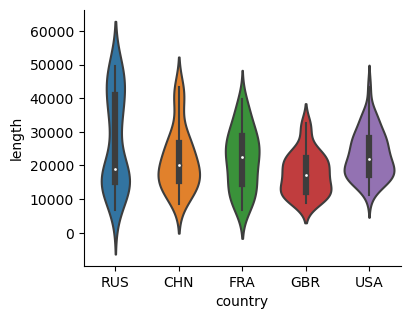

In [38]:
## 범주 간의 값 분포 비교
# 안보리 상임이사국 5개국의 연설문 길이 length column 의 분포 비교
import seaborn as sns
# 안보리 상임이사국 조건문
where=df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
# 박스플롯
g=sns.catplot(data=df[where], x='country', y='length', kind='box')
g.fig.set_size_inches(4, 3) ### x,y 의 비율 결정
g.fig.set_dpi(100) ### 도화지의 크기 결정
# 바이올린 플롯
v=sns.catplot(data=df[where], x='country', y='length', kind='violin')
v.fig.set_size_inches(4,3)
v.fig.set_dpi(100) 


<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

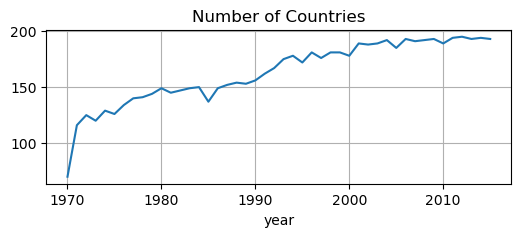

In [46]:
## 시간 경과에 따른 변화 시각화
# 연도별, 국가 수의 그래프
df.groupby('year').size().plot(title='Number of Countries', figsize=(6,2), grid=True)

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

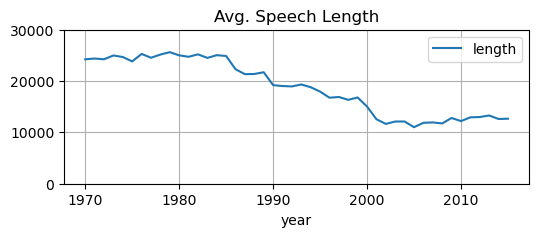

In [48]:
# 연도별, 연설문의 평균 길이
df.groupby('year').agg({'length':'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000)
                                              , figsize=(6,2), grid=True)
# .agg({컬럼명:적용할 함수명})

# 1.5 Pipeline

In [55]:
## 정규표현식을 이용한 토큰화
# p{L}: 하나 이상의 문자(외국문자 움라우트 같은 거도 포섭가능하도록하는)
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

# 예제
text="Let's defeat SARS-CoV-2 together in 2020!"
tokens=tokenize(text)
print(tokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in']


In [63]:
## 불용어 처리
# set을 사용하여 조회시간 줄여주자(해쉬구조)
import nltk # natural language toolkit

stopwords=set(nltk.corpus.stopwords.words('english')) # 말뭉치.불용어.워드=영어
print("stopwords:\n", stopwords)

# stopwords에 없는 토큰들만 리스트로 반환하는 함수
def remove_stopwords(tokens):
    stopwords=set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# stopwords에 추가하거나, stopwords에서 제거하려는 토큰들(stopwords가 해쉬 집합으로 되어있어서 {})
include_stopwords={'dear','regards','must','would','also'}
exclude_stopwords={'against'}
# stopwords 재정의
stopwords|=include_stopwords # set()|set() 합집합
stopwords-=exclude_stopwords # set()-set() 교집합
print("stopwords:\n", sorted(stopwords))

stopwords:
 {'herself', 'yours', 'themselves', 'further', 'this', 'd', 'couldn', 'for', 'don', 'before', 'off', 'over', 'again', 'more', 're', "doesn't", 'won', 'itself', 'if', 'how', "she's", 'by', 'yourselves', 'just', 'should', 'weren', "you'll", 'are', 'own', 'had', 'only', "it's", 't', 'ours', 'but', "shouldn't", "couldn't", "don't", 'not', 'between', 'here', 'of', 'whom', 'o', 'being', "that'll", "you've", 'myself', 'wasn', 'does', 'above', 'some', 'nor', 'ain', 'himself', 'theirs', 'do', 'shouldn', 'having', 'we', "needn't", 'y', 'all', 'both', 'will', 'after', 'their', 'did', 'doing', 'was', 'until', 'didn', "you'd", 'wouldn', 'below', 'other', 'he', 'you', 'and', 'her', 'out', 'into', 'been', "wouldn't", 'ourselves', 'down', 'same', 'him', 'from', "hadn't", "mustn't", 'so', 'ma', 'under', "aren't", "didn't", 'it', 'isn', 'they', 'your', 'why', 'with', 'those', 'she', 'against', 'hers', 've', 'then', 'aren', 'mustn', 'can', 'what', 'than', 'an', 'about', 'as', "weren't", 'each'

In [66]:
## 파이프라인
pipeline = [str.lower,tokenize, remove_stopwords] # 대소문자 변환, 토큰화, 불용어 제거

def prepare(text,pipeline):
    tokens=text
    for transform in pipeline:
        tokens=transform(tokens)
    return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
display(df.sample(frac=0.05))

,session,year,country,text,country_name,speaker,position,length,tokens,num_tokens
2194,43,1988,SLB,"﻿\nSir, permit me to extend to you my congratu...",Solomon Islands,Peter KEMILOBEA,NaN,11890,"[sir, permit, extend, congratulations, electio...",1011
5508,70,2015,GEO,It is a great honour to once again address the...,Georgia,Mr. Irakli Garibashvili,Prime minister,14220,"[great, honour, address, general, assembly, ma...",1265
3647,60,2005,ISR,It is my unique pleasure to\npraise His Excell...,Israel,"Silvan Shalom,",Deputy Prime Minister,11264,"[unique, pleasure, praise, excellency, ambassa...",965
5060,66,2011,BLR,Much has been said from this rostrum in recent...,Belarus,Sergei Martynov,Minister for Foreign Affairs,12077,"[much, said, rostrum, recent, years, global, g...",1018
2566,50,1995,BHS,On behalf of the\nGovernment and the people of...,Bahamas,Mrs. Bostwick,Minister for Foreign Affairs,14121,"[behalf, government, people, commonwealth, bah...",1130
...,...,...,...,...,...,...,...,...,...,...
428,40,1985,CHL,On behalf of the Chilean delegation I wish fir...,Chile,Mr. Del Valle,NaN,30966,"[behalf, chilean, delegation, wish, first, con...",2529
1081,57,2002,CRI,"﻿Allow me to congratulate Mr. Jan Kavan, and t...",Costa Rica,Roberto Tovar Faja,Minister for Foreign Affairs,10713,"[allow, congratulate, mr, jan, kavan, czech, r...",929
6882,27,1972,CIV,"I am happy, Sir, to express to you the warm co...",Ivory Coast,Mr. Usher,NaN,20813,"[happy, sir, express, warm, congratulations, i...",1639
4755,35,1980,ARE,"﻿Permit me at the outset, sir, to extend to yo...",UAE,Abdullah,NaN,18677,"[permit, outset, sir, extend, behalf, delegati...",1510


# 1.6 Word Frequncy Analysis